In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
%matplotlib inline

from mat2json import loadMat
from util import getBatteryCapacity, getChargingValues, getDischargingValues, getDataframe, series_to_supervised, rollingAverage

In [6]:
#Ambient temp 24
B0005 = loadMat('B0005.mat')
B0006 = loadMat('B0006.mat')
B0007 = loadMat('B0007.mat')
B0018 = loadMat('B0018.mat')

#Ambient temp 43
B0029 = loadMat('B0029.mat')
B0030 = loadMat('B0030.mat')
B0031 = loadMat('B0031.mat')
B0032 = loadMat('B0032.mat')

#Ambient temp 4
B0041 = loadMat('B0041.mat')
B0053 = loadMat('B0053.mat')
B0054 = loadMat('B0054.mat')
B0055 = loadMat('B0055.mat')
B0056 = loadMat('B0056.mat')

In [7]:
B0005_capacity = getBatteryCapacity(B0005)
B0006_capacity = getBatteryCapacity(B0006)
B0007_capacity = getBatteryCapacity(B0007)
B0018_capacity = getBatteryCapacity(B0018)

B0029_capacity = getBatteryCapacity(B0029)
B0030_capacity = getBatteryCapacity(B0030)
B0031_capacity = getBatteryCapacity(B0031)
B0032_capacity = getBatteryCapacity(B0032)

B0053_capacity = getBatteryCapacity(B0053)
B0054_capacity = getBatteryCapacity(B0054)
B0055_capacity = getBatteryCapacity(B0055)
B0056_capacity = getBatteryCapacity(B0056)

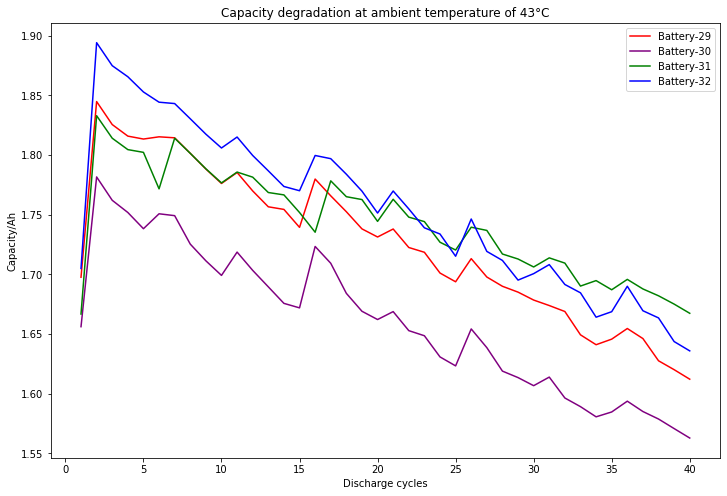

In [8]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(B0029_capacity[0], B0029_capacity[1], color='red', label='Battery-29')
ax.plot(B0030_capacity[0], B0030_capacity[1], color='purple', label='Battery-30')
ax.plot(B0031_capacity[0], B0031_capacity[1], color='green', label='Battery-31')
ax.plot(B0032_capacity[0], B0032_capacity[1], color='blue', label='Battery-32')
ax.set(xlabel='Discharge cycles', ylabel='Capacity/Ah', title='Capacity degradation at ambient temperature of 43°C')
plt.legend()

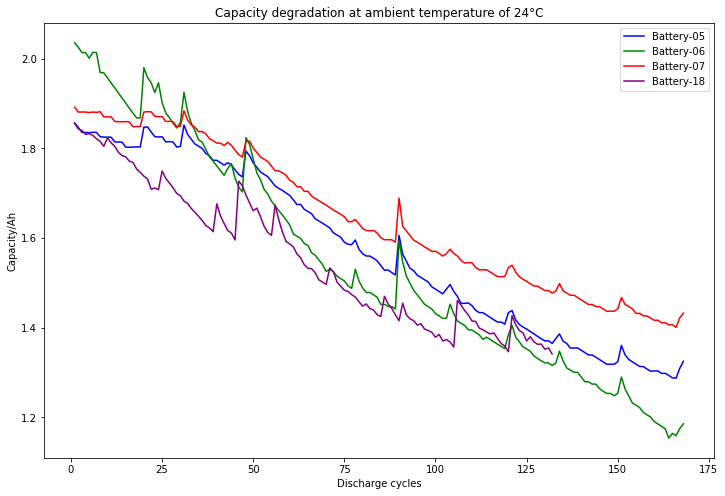

In [9]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(B0005_capacity[0], B0005_capacity[1], color='blue', label='Battery-05')
ax.plot(B0006_capacity[0], B0006_capacity[1], color='green', label='Battery-06')
ax.plot(B0007_capacity[0], B0007_capacity[1], color='red', label='Battery-07')
ax.plot(B0018_capacity[0], B0018_capacity[1], color='purple', label='Battery-18')
ax.set(xlabel='Discharge cycles', ylabel='Capacity/Ah', title='Capacity degradation at ambient temperature of 24°C')
plt.legend()

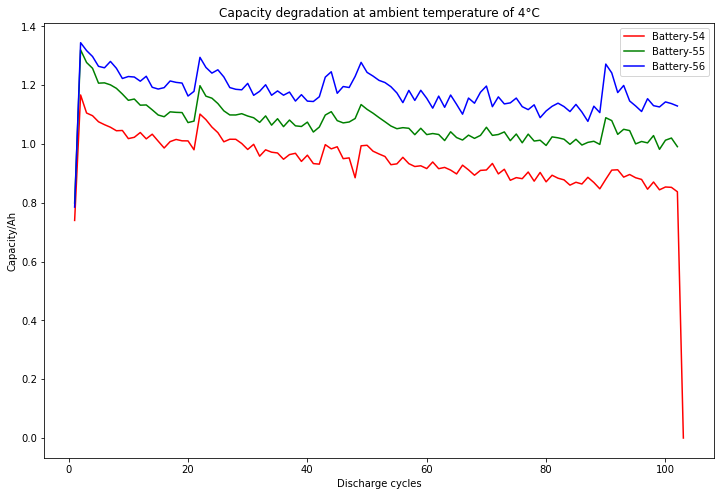

In [10]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(B0054_capacity[0], B0054_capacity[1], color='red', label='Battery-54')
ax.plot(B0055_capacity[0], B0055_capacity[1], color='green', label='Battery-55')
ax.plot(B0056_capacity[0], B0056_capacity[1], color='blue', label='Battery-56')
ax.set(xlabel='Discharge cycles', ylabel='Capacity/Ah', title='Capacity degradation at ambient temperature of 4°C')
plt.legend()

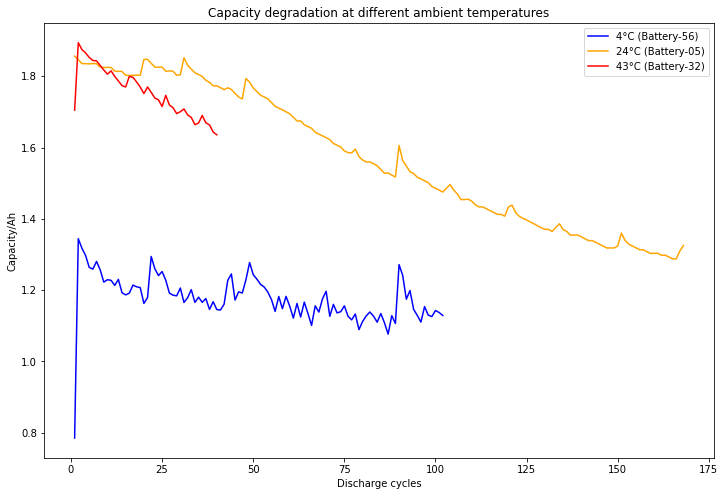

In [11]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(B0056_capacity[0], B0056_capacity[1], color='blue', label='4°C (Battery-56)')
ax.plot(B0005_capacity[0], B0005_capacity[1], color='orange', label='24°C (Battery-05)')
ax.plot(B0032_capacity[0], B0032_capacity[1], color='red', label='43°C (Battery-32)')
ax.set(xlabel='Discharge cycles', ylabel='Capacity/Ah', title='Capacity degradation at different ambient temperatures')
plt.legend()

In [12]:
ployfit4degree = np.polyfit(B0056_capacity[0], B0056_capacity[1], 1)
ployfit24degree = np.polyfit(B0005_capacity[0], B0005_capacity[1], 1)
ployfit43degree = np.polyfit(B0032_capacity[0], B0032_capacity[1], 1)

In [13]:
pred_range = []
for i in range(1, 270):
    pred_range.append(i)

In [14]:
B0056_capacity_pred = np.polyval(ployfit4degree, pred_range)
B0005_capacity_pred = np.polyval(ployfit24degree, pred_range)
B0032_capacity_pred = np.polyval(ployfit43degree, pred_range)

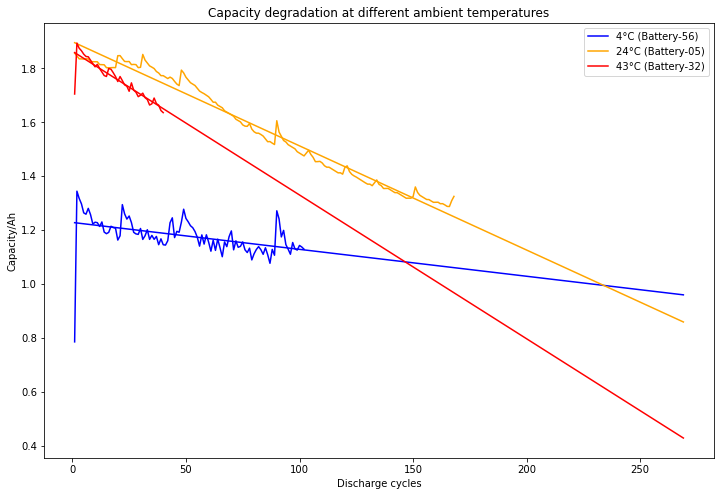

In [15]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(B0056_capacity[0], B0056_capacity[1], color='blue', label='4°C (Battery-56)')
ax.plot(pred_range, B0056_capacity_pred, color='blue')
ax.plot(B0005_capacity[0], B0005_capacity[1], color='orange', label='24°C (Battery-05)')
ax.plot(pred_range, B0005_capacity_pred, color='orange')
ax.plot(B0032_capacity[0], B0032_capacity[1], color='red', label='43°C (Battery-32)')
ax.plot(pred_range, B0032_capacity_pred, color='red')
ax.set(xlabel='Discharge cycles', ylabel='Capacity/Ah', title='Capacity degradation at different ambient temperatures')
plt.legend()

In [16]:
B0005_charging = getChargingValues(B0005, 0)
B0029_charging = getChargingValues(B0029, 2)
B0054_charging = getChargingValues(B0054, 5)

In [17]:
charging_labels = ['Voltage_measured','Current_measured','Temperature_measured']

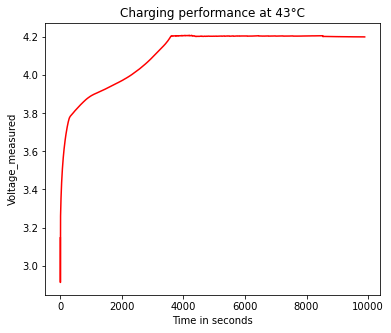

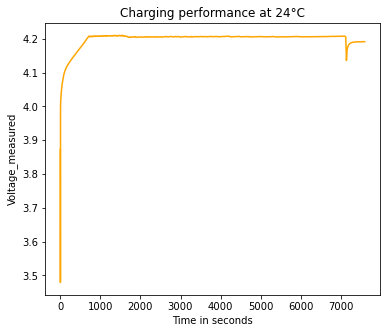

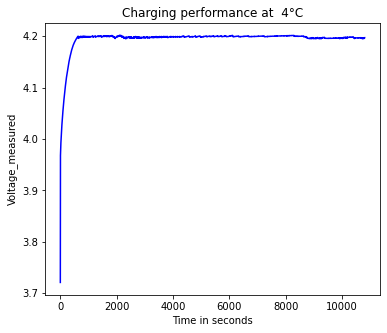

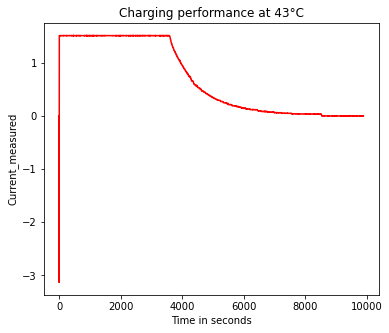

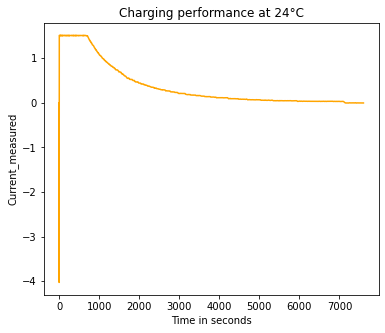

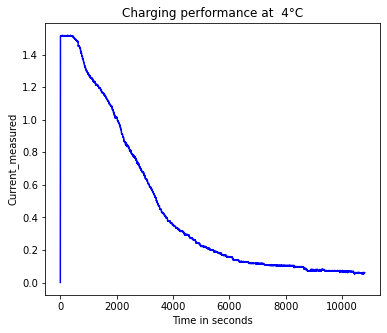

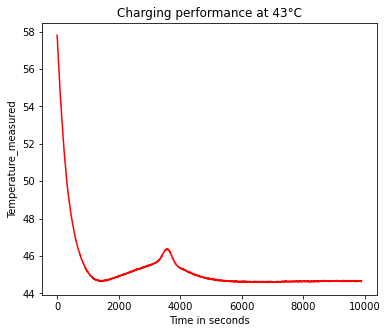

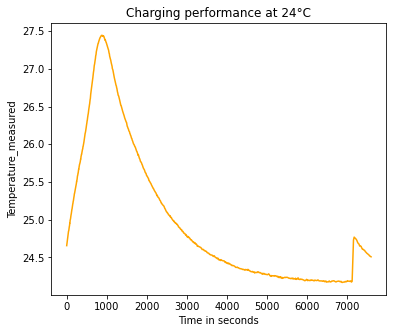

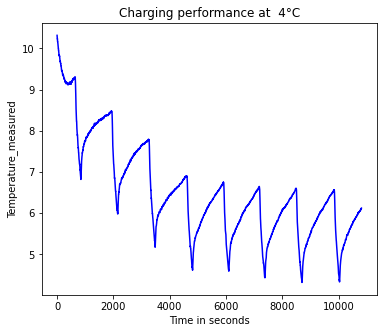

In [18]:
indx = 1
for label in charging_labels:
    fig, ax = plt.subplots(1, figsize=(6, 5))
    fig1, ax1 = plt.subplots(1, figsize=(6, 5))
    fig2, ax2 = plt.subplots(1, figsize=(6, 5))

    ax.plot(B0029_charging[5], B0029_charging[indx], color='red')
    ax1.plot(B0005_charging[5], B0005_charging[indx], color='orange')
    ax2.plot(B0054_charging[5], B0054_charging[indx], color='blue')

    ax.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at 43°C')
    ax1.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at 24°C')
    ax2.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at  4°C')
    
    indx += 1

In [19]:
B0005_charging_400 = getChargingValues(B0005, 400)
B0029_charging_95 = getChargingValues(B0029, 95)
B0054_charging_251 = getChargingValues(B0054, 251)

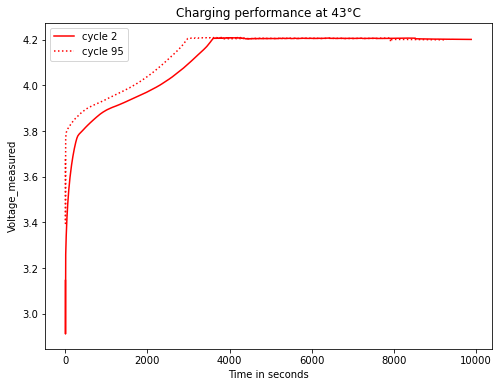

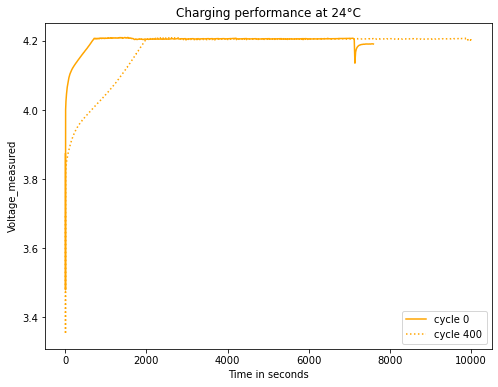

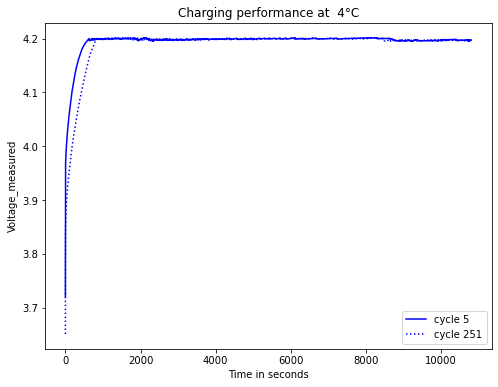

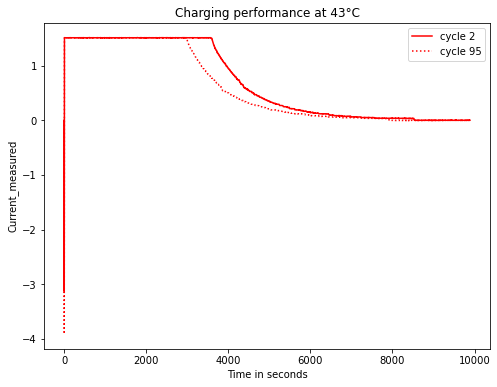

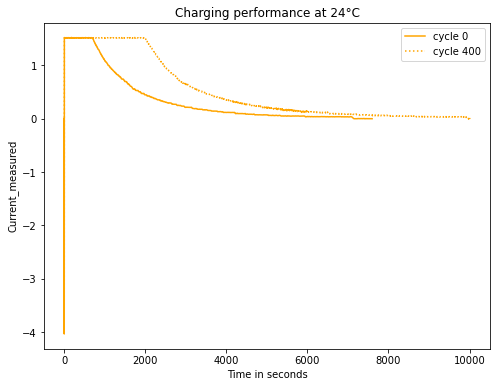

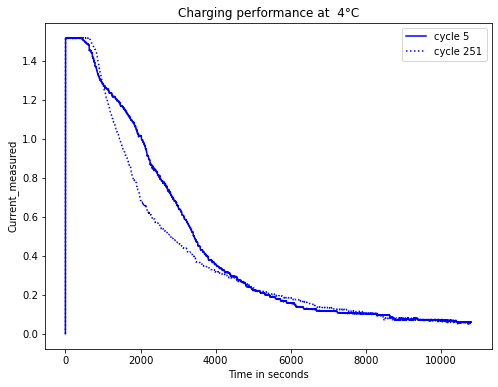

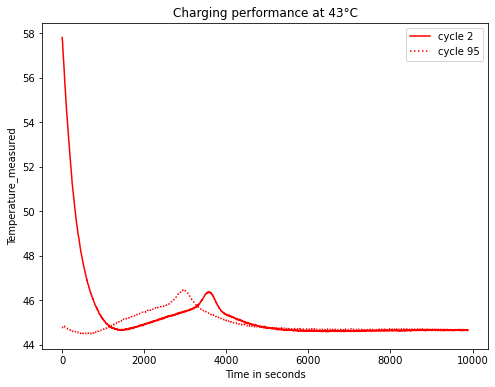

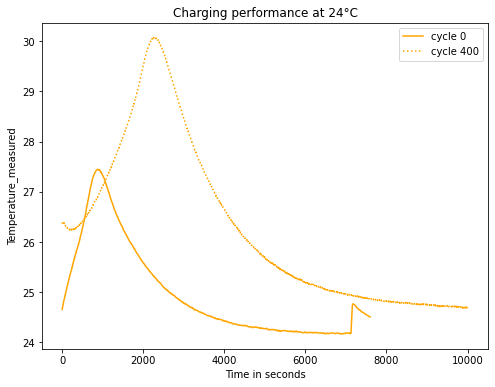

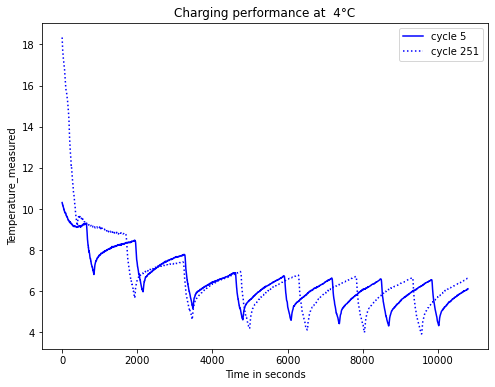

In [20]:
indx = 1
for label in charging_labels:
    fig, ax = plt.subplots(1, figsize=(8, 6))
    fig1, ax1 = plt.subplots(1, figsize=(8, 6))
    fig2, ax2 = plt.subplots(1, figsize=(8, 6))

    ax.plot(B0029_charging[5], B0029_charging[indx], color='red', label='cycle 2')
    ax.plot(B0029_charging_95[5], B0029_charging_95[indx], linestyle=':', color='red', label='cycle 95')
    ax1.plot(B0005_charging[5], B0005_charging[indx], color='orange', label='cycle 0')
    ax1.plot(B0005_charging_400[5], B0005_charging_400[indx], linestyle=':', color='orange', label='cycle 400')
    ax2.plot(B0054_charging[5], B0054_charging[indx], color='blue', label='cycle 5')
    ax2.plot(B0054_charging_251[5], B0054_charging_251[indx], linestyle=':', color='blue', label='cycle 251')

    ax.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at 43°C')
    ax1.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at 24°C')
    ax2.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at  4°C')
    ax.legend()
    ax1.legend()
    ax2.legend()
    
    indx += 1

In [21]:
B0029_charging_71 = getChargingValues(B0029, 71)
B0029_charging_32 = getChargingValues(B0029, 32)

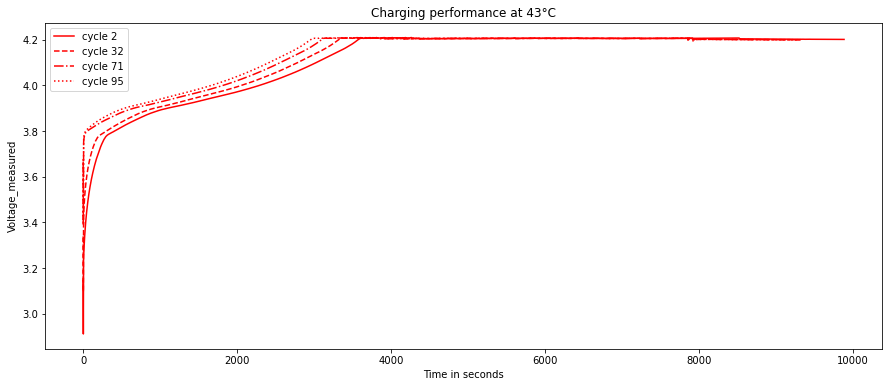

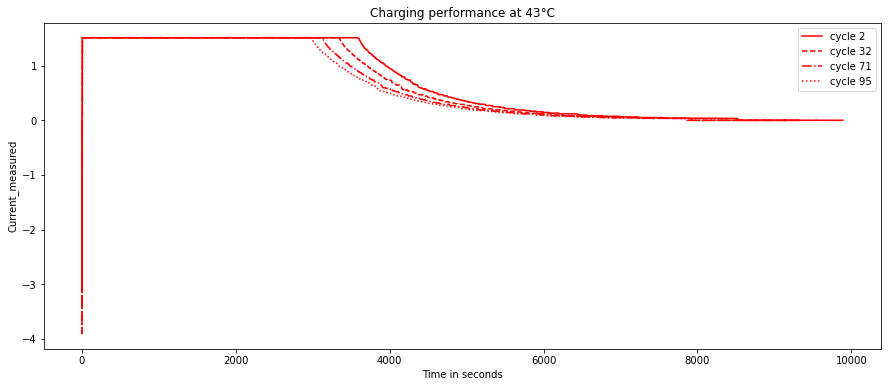

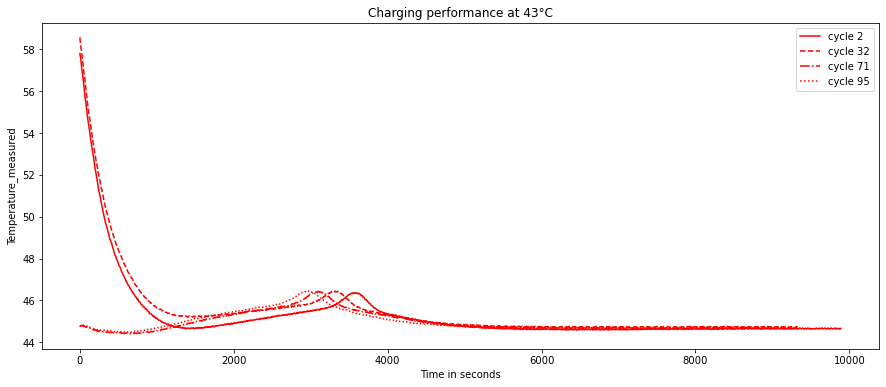

In [22]:
indx = 1
for label in charging_labels:
    fig, ax = plt.subplots(1, figsize=(15, 6))

    ax.plot(B0029_charging[5], B0029_charging[indx], color='red', label='cycle 2')
    ax.plot(B0029_charging_32[5], B0029_charging_32[indx], linestyle='--', color='red', label='cycle 32')
    ax.plot(B0029_charging_71[5], B0029_charging_71[indx], linestyle='-.', color='red', label='cycle 71')
    ax.plot(B0029_charging_95[5], B0029_charging_95[indx], linestyle=':', color='red', label='cycle 95')

    ax.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at 43°C')
    ax.legend()
    
    indx += 1

In [23]:
B0005_discharging = getDischargingValues(B0005, 1)
B0029_discharging = getDischargingValues(B0029, 1)
B0054_discharging = getDischargingValues(B0054, 0)

In [24]:
discharging_labels = ['Voltage_measured','Current_measured','Temperature_measured']

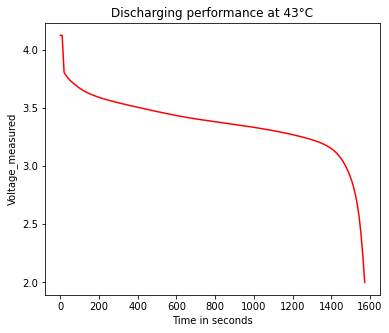

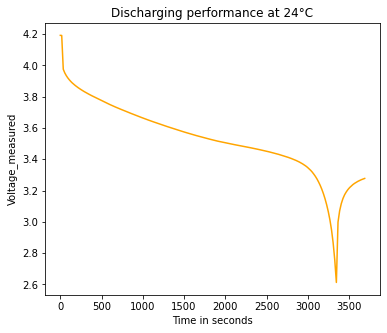

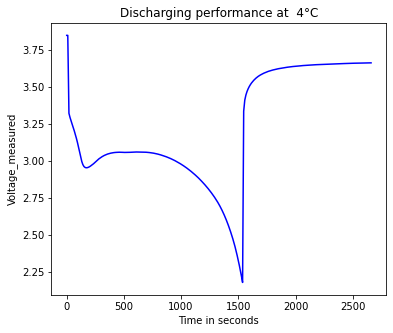

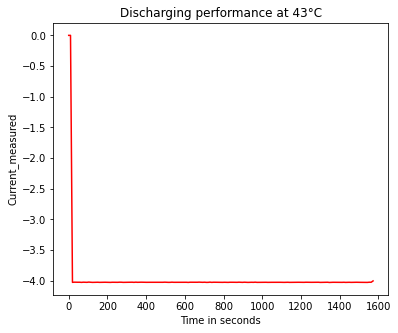

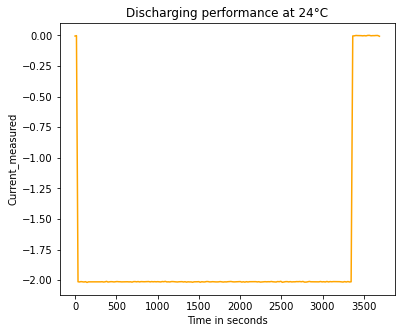

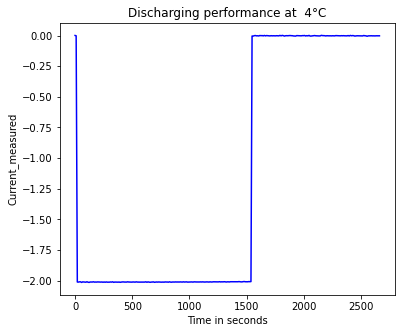

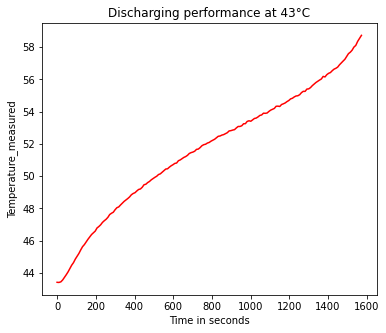

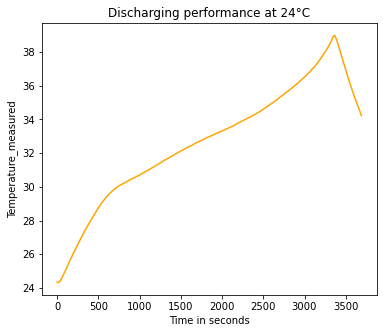

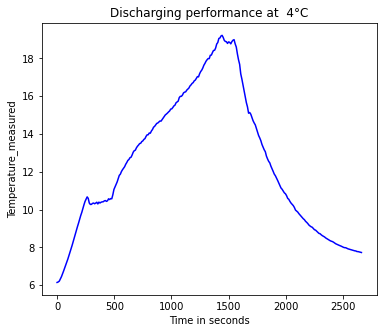

In [25]:
indx = 1
for label in discharging_labels:
    fig, ax = plt.subplots(1, figsize=(6, 5))
    fig1, ax1 = plt.subplots(1, figsize=(6, 5))
    fig2, ax2 = plt.subplots(1, figsize=(6, 5))

    ax.plot(B0029_discharging[5], B0029_discharging[indx], color='red')
    ax1.plot(B0005_discharging[5], B0005_discharging[indx], color='orange')
    ax2.plot(B0054_discharging[5], B0054_discharging[indx], color='blue')

    ax.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at 43°C')
    ax1.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at 24°C')
    ax2.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at  4°C')
    
    indx += 1

In [26]:
B0005_discharging_402 = getDischargingValues(B0005, 402)
B0029_discharging_93 = getDischargingValues(B0029, 93)
B0054_discharging_250 = getDischargingValues(B0054, 250)

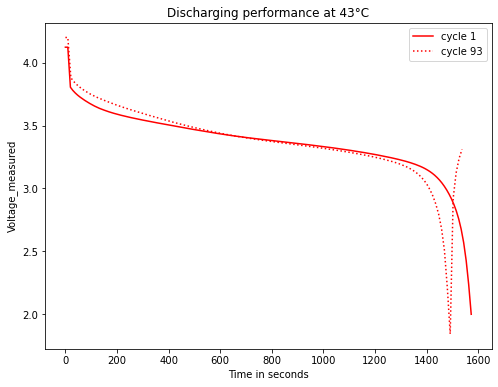

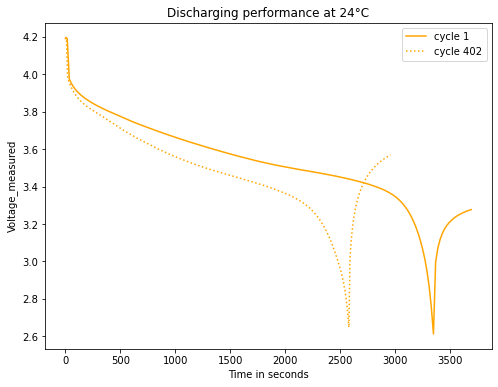

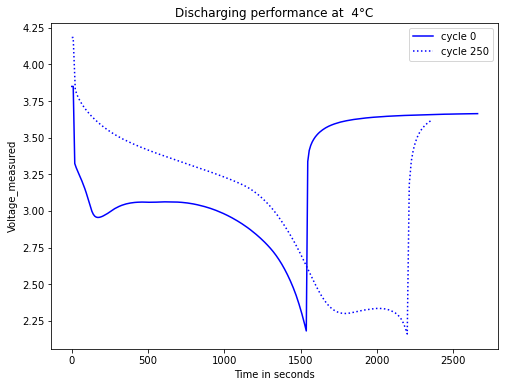

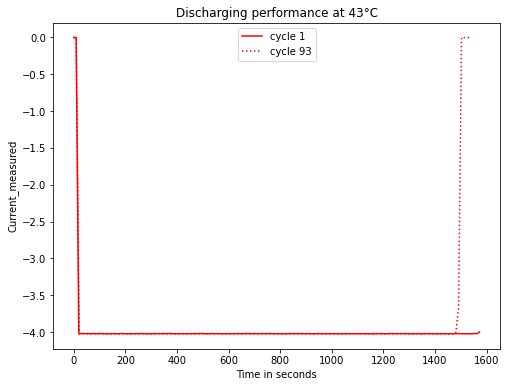

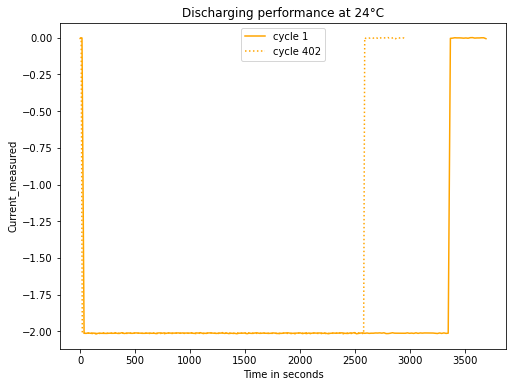

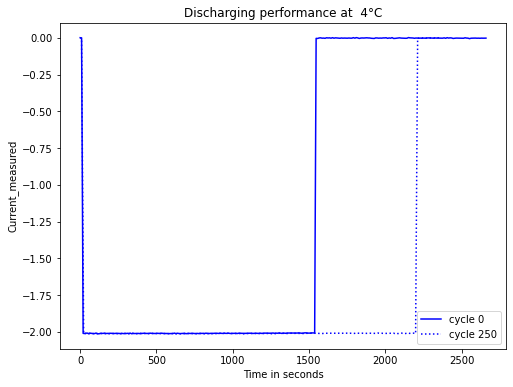

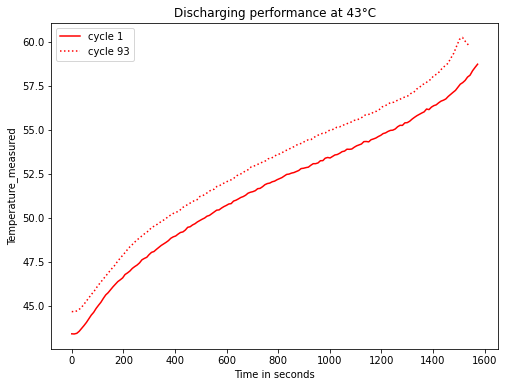

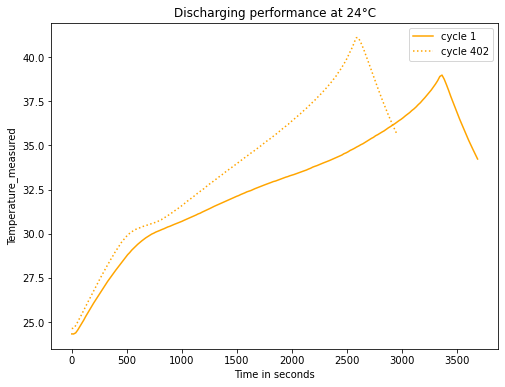

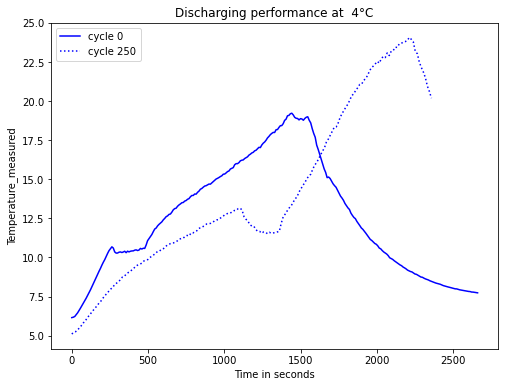

In [27]:
indx = 1
for label in charging_labels:
    fig, ax = plt.subplots(1, figsize=(8, 6))
    fig1, ax1 = plt.subplots(1, figsize=(8, 6))
    fig2, ax2 = plt.subplots(1, figsize=(8, 6))

    ax.plot(B0029_discharging[5], B0029_discharging[indx], color='red', label='cycle 1')
    ax.plot(B0029_discharging_93[5], B0029_discharging_93[indx], linestyle=':', color='red', label='cycle 93')
    ax1.plot(B0005_discharging[5], B0005_discharging[indx], color='orange', label='cycle 1')
    ax1.plot(B0005_discharging_402[5], B0005_discharging_402[indx], linestyle=':', color='orange', label='cycle 402')
    ax2.plot(B0054_discharging[5], B0054_discharging[indx], color='blue', label='cycle 0')
    ax2.plot(B0054_discharging_250[5], B0054_discharging_250[indx], linestyle=':', color='blue', label='cycle 250')

    ax.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at 43°C')
    ax1.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at 24°C')
    ax2.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at  4°C')
    ax.legend()
    ax1.legend()
    ax2.legend()
    
    indx += 1

In [28]:
B0054_discharging_124 = getDischargingValues(B0054, 124)
B0054_discharging_52 = getDischargingValues(B0054, 52)

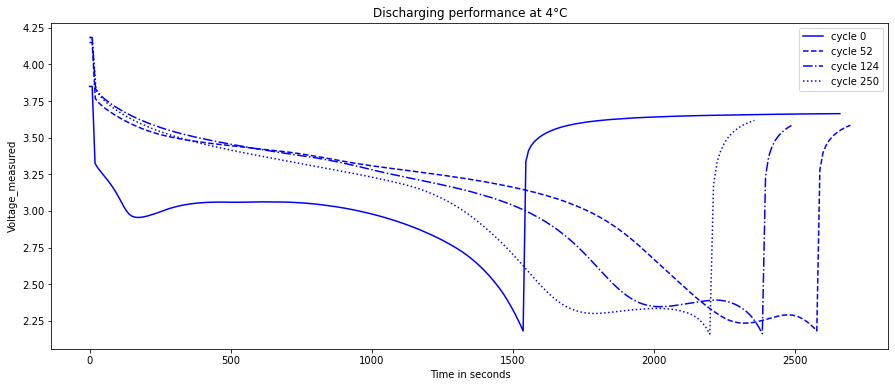

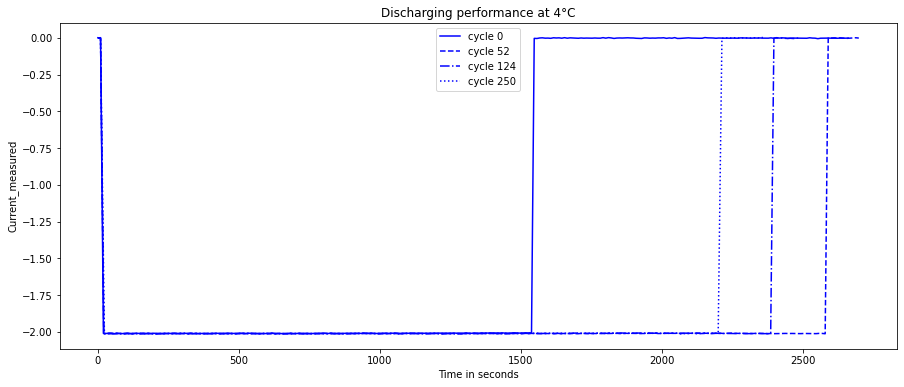

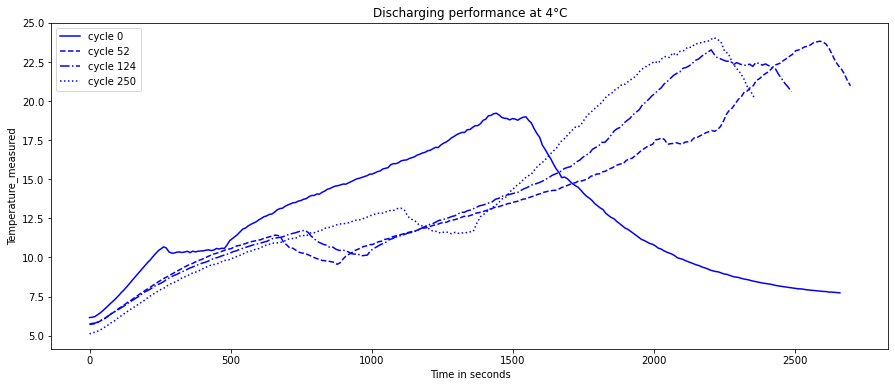

In [29]:
indx = 1
for label in charging_labels:
    fig, ax = plt.subplots(1, figsize=(15, 6))

    ax.plot(B0054_discharging[5], B0054_discharging[indx], color='blue', label='cycle 0')
    ax.plot(B0054_discharging_52[5], B0054_discharging_52[indx], linestyle='--', color='blue', label='cycle 52')
    ax.plot(B0054_discharging_124[5], B0054_discharging_124[indx], linestyle='-.', color='blue', label='cycle 124')
    ax.plot(B0054_discharging_250[5], B0054_discharging_250[indx], linestyle=':', color='blue', label='cycle 250')

    ax.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at 4°C')
    ax.legend()
    
    indx += 1

In [30]:
dfB0005 = getDataframe(B0005)

In [31]:
dfB0005.head(5)

,cycle,capacity,max_discharge_temp,max_charge_temp
0,1,1.856487,38.982181,27.445134
1,2,1.846327,39.033398,29.341949
2,3,1.835349,38.818797,29.553301
3,4,1.835263,38.762305,29.456340
4,5,1.834646,38.665393,29.481334


C:\Users\sujeb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cycle', ylabel='capacity'>

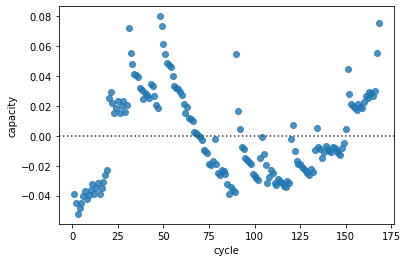

In [32]:
sns.residplot(dfB0005['cycle'], dfB0005['capacity'])

# Model Building

In [33]:
dfB0006 = getDataframe(B0006)
dfB0007 = getDataframe(B0007)
dfB0018 = getDataframe(B0018)

In [34]:
dfB0006.head(10)

,cycle,capacity,max_discharge_temp,max_charge_temp
0,1,2.035338,39.162987,27.355870
1,2,2.025140,39.246203,31.874973
2,3,2.013326,38.999202,32.149173
3,4,2.013285,38.843628,32.017074
4,5,2.000528,38.977989,31.921070
5,6,2.013899,38.839899,32.032402
6,7,2.013101,39.046108,32.002633
7,8,1.968790,38.875075,32.204361
8,9,1.968166,38.726054,32.089091
9,10,1.957231,38.986297,31.997731


In [35]:
X = dfB0007['cycle']
Y = dfB0007['capacity']

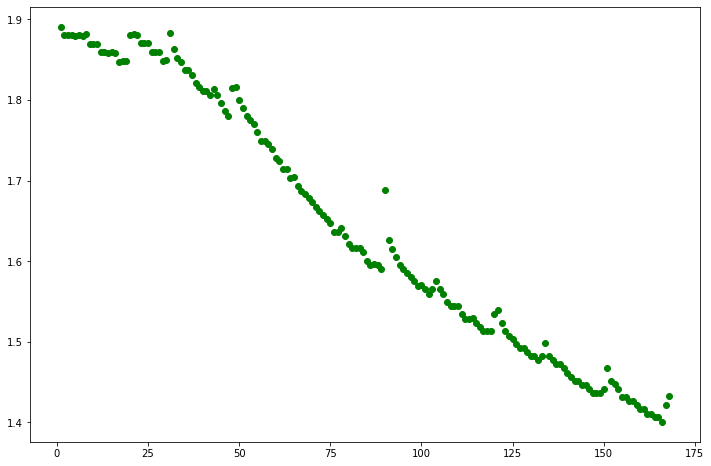

In [36]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.scatter(X, Y, color='green', label='Battery')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [38]:
lst_x, lst_y = rollingAverage(X_train, y_train)
d = {'X_train':X_train.values,'y_train':y_train.values}
d = pd.DataFrame(d)
d = d[~d['X_train'].isin(lst_x)]
X_train = d['X_train']
y_train = d['y_train']

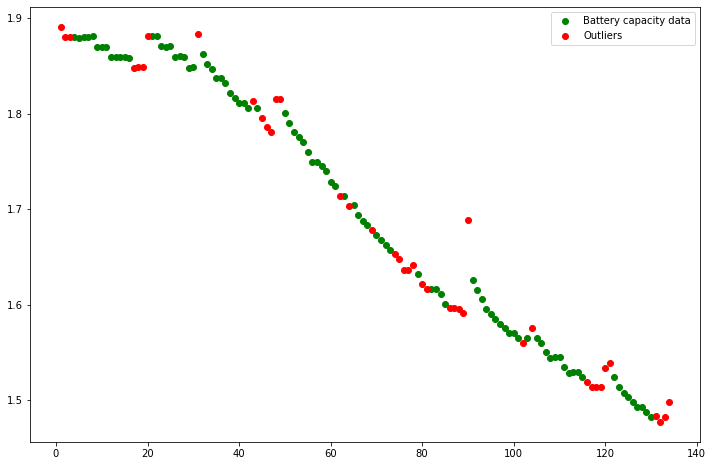

In [39]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.scatter(X_train, y_train, color='green', label='Battery capacity data')
ax.scatter(lst_x, lst_y, color='red', label='Outliers')
ax.legend()

In [40]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

In [43]:
best_svr = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [45]:
best_svr.fit(X_train,y_train)
y_pred = best_svr.predict(X.values.reshape(-1, 1))

C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


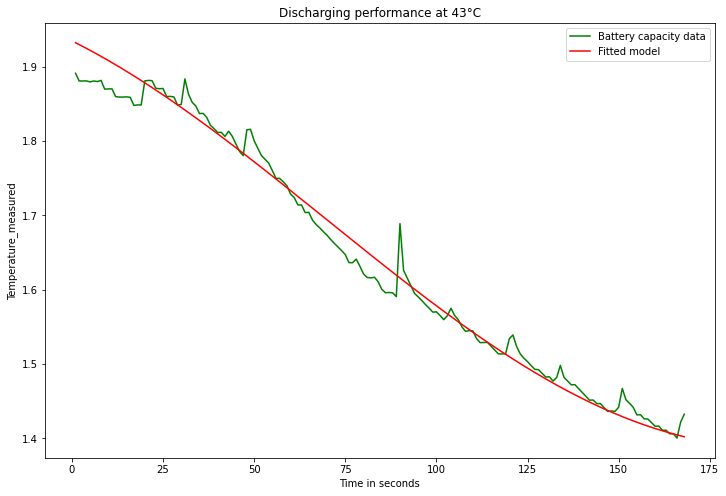

In [46]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='green', label='Battery capacity data')
ax.plot(X, y_pred, color='red', label='Fitted model')
ax.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at 43°C')
ax.legend()

C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

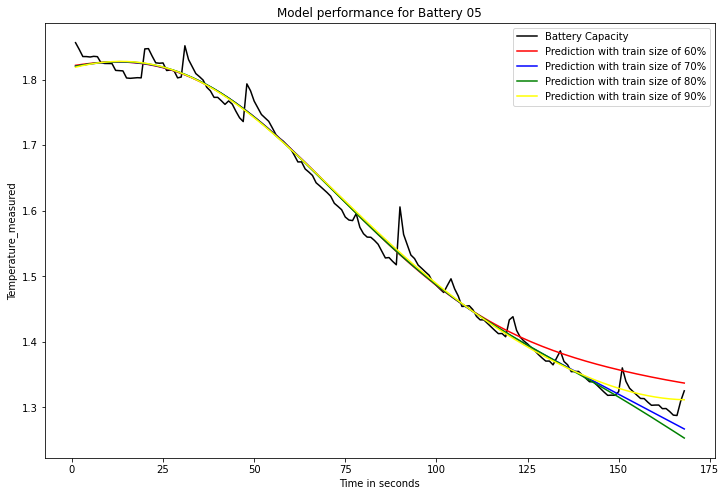

In [47]:
X = dfB0005['cycle']
Y = dfB0005['capacity']
ratios = [40, 30, 20, 10]
for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, shuffle=False)
    lst_x, lst_y = rollingAverage(X_train, y_train)
    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)
    d = d[~d['X_train'].isin(lst_x)]
    X_train = d['X_train']
    y_train = d['y_train']
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    best_svr = SVR(C=20, epsilon=0.0001, gamma=0.0001, cache_size=200,
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train,y_train)
    if ratio == 40:
        y_pred_40 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 30:
        y_pred_30 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 20:
        y_pred_20 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 10:
        y_pred_10 = best_svr.predict(X.values.reshape(-1, 1))
        
    
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='black', label='Battery Capacity')
ax.plot(X, y_pred_40, color='red', label='Prediction with train size of 60%')
ax.plot(X, y_pred_30, color='blue', label='Prediction with train size of 70%')
ax.plot(X, y_pred_20, color='green', label='Prediction with train size of 80%')
ax.plot(X, y_pred_10, color='yellow', label='Prediction with train size of 90%')

ax.set(xlabel='Time in seconds', ylabel=label, title='Model performance for Battery 05')
ax.legend()

C:\Users\sujeb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cycle', ylabel='capacity'>

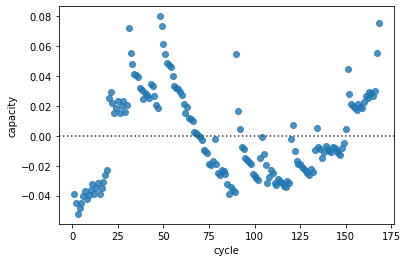

In [48]:
sns.residplot(X, Y)

C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

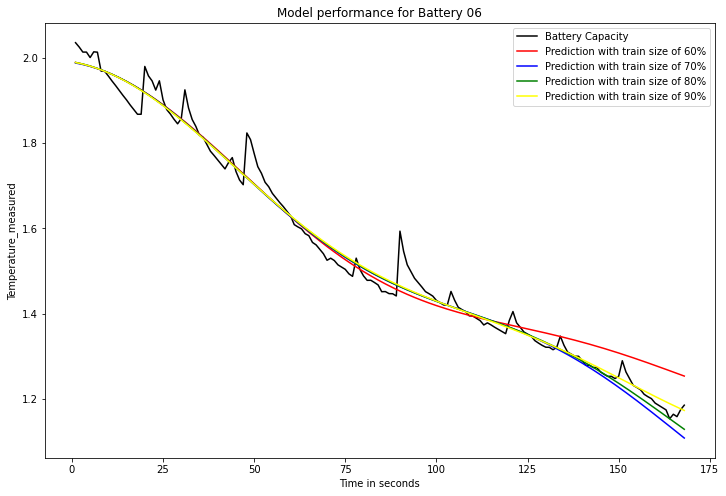

In [49]:
X = dfB0006['cycle']
Y = dfB0006['capacity']
ratios = [40, 30, 20, 10]
for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, shuffle=False)
    lst_x, lst_y = rollingAverage(X_train, y_train)
    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)
    d = d[~d['X_train'].isin(lst_x)]
    X_train = d['X_train']
    y_train = d['y_train']
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    best_svr = SVR(C=10, epsilon=0.0001, gamma=0.0001, cache_size=200,
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train,y_train)
    if ratio == 40:
        y_pred_40 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 30:
        y_pred_30 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 20:
        y_pred_20 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 10:
        y_pred_10 = best_svr.predict(X.values.reshape(-1, 1))
        
    
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='black', label='Battery Capacity')
ax.plot(X, y_pred_40, color='red', label='Prediction with train size of 60%')
ax.plot(X, y_pred_30, color='blue', label='Prediction with train size of 70%')
ax.plot(X, y_pred_20, color='green', label='Prediction with train size of 80%')
ax.plot(X, y_pred_10, color='yellow', label='Prediction with train size of 90%')

ax.set(xlabel='Time in seconds', ylabel=label, title='Model performance for Battery 06')
ax.legend()

C:\Users\sujeb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cycle', ylabel='capacity'>

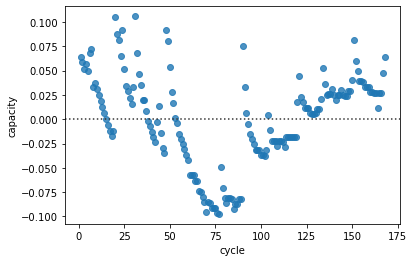

In [50]:
sns.residplot(X, Y)

C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

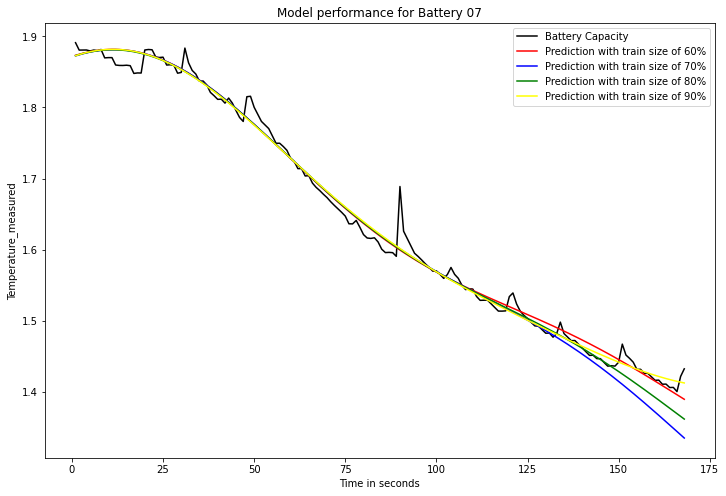

In [51]:
X = dfB0007['cycle']
Y = dfB0007['capacity']
ratios = [40, 30, 20, 10]
for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, shuffle=False)
    lst_x, lst_y = rollingAverage(X_train, y_train)
    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)
    d = d[~d['X_train'].isin(lst_x)]
    X_train = d['X_train']
    y_train = d['y_train']
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    best_svr = SVR(C=10, epsilon=0.0001, gamma=0.0001, cache_size=200,
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train,y_train)
    if ratio == 40:
        y_pred_40 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 30:
        y_pred_30 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 20:
        y_pred_20 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 10:
        y_pred_10 = best_svr.predict(X.values.reshape(-1, 1))
        
    
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='black', label='Battery Capacity')
ax.plot(X, y_pred_40, color='red', label='Prediction with train size of 60%')
ax.plot(X, y_pred_30, color='blue', label='Prediction with train size of 70%')
ax.plot(X, y_pred_20, color='green', label='Prediction with train size of 80%')
ax.plot(X, y_pred_10, color='yellow', label='Prediction with train size of 90%')

ax.set(xlabel='Time in seconds', ylabel=label, title='Model performance for Battery 07')
ax.legend()

C:\Users\sujeb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cycle', ylabel='capacity'>

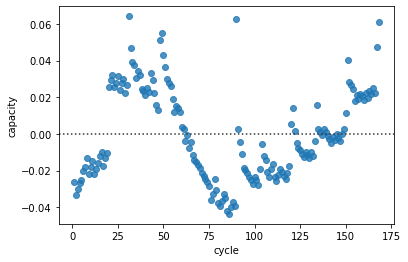

In [52]:
sns.residplot(X, Y)

C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sujeb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

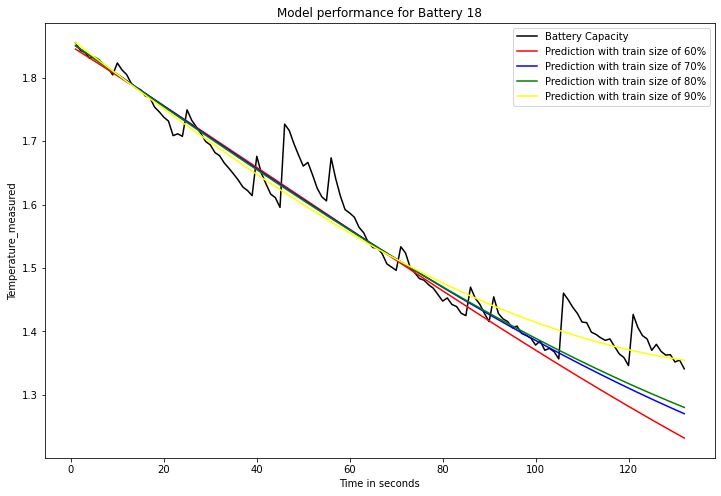

In [53]:
X = dfB0018['cycle']
Y = dfB0018['capacity']
ratios = [40, 30, 20, 10]
for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, shuffle=False)
    lst_x, lst_y = rollingAverage(X_train, y_train)
    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)
    d = d[~d['X_train'].isin(lst_x)]
    X_train = d['X_train']
    y_train = d['y_train']
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    best_svr = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200,
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    best_svr.fit(X_train,y_train)
    if ratio == 40:
        y_pred_40 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 30:
        y_pred_30 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 20:
        y_pred_20 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 10:
        y_pred_10 = best_svr.predict(X.values.reshape(-1, 1))
        
    
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(X, Y, color='black', label='Battery Capacity')
ax.plot(X, y_pred_40, color='red', label='Prediction with train size of 60%')
ax.plot(X, y_pred_30, color='blue', label='Prediction with train size of 70%')
ax.plot(X, y_pred_20, color='green', label='Prediction with train size of 80%')
ax.plot(X, y_pred_10, color='yellow', label='Prediction with train size of 90%')

ax.set(xlabel='Time in seconds', ylabel=label, title='Model performance for Battery 18')
ax.legend()

C:\Users\sujeb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cycle', ylabel='capacity'>

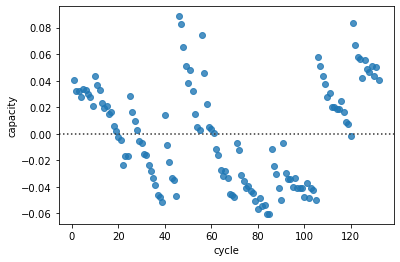

In [54]:
sns.residplot(X, Y)